## Explore the COVID  Deaths Data 

### [Quick intro to the project, feel free to keep it short]

In [1]:
# Not-exhaustive project checklist
# Note: this is not a writing assignment, but you should still incorporate comments or headers throughout
# -- This will help others who review your work, but will also help you keep track of what you're doing
# -- Just think about what would help you understand a peer's project when you have to grade theirs later


# 1) Dataset included
# 1a) Dataset explained/documented when used
# 2) Analysis performed
# 2a) Analysis steps documented, explained briefly
# 3) Visualizations/outputs
# 4) Conclusion
# ---Did you answer your questions?
# ---Did you find anything else?
# ---What problems did you run into?
# ---Any suggestions for future research?

# Critical checks before submission
# - Does the noteboook run without error? (Kernel>restart & run all => no errors at all? No long periods of processing?)
# - Do you have your dataset included here? You shouldn't be connecting to any external data
# - - Even if external datasets work here, they WILL NOT work for peer-grading, and you may get a 0.

# Introduction:
This notebook we will explore the Covid deaths data by various methods learned in this class and come to a conclusion after all the analysis.

# Project Description: 

Dataset obtained from Kaggle and has Covid provisional death data by Sex and Age in years
https://www.kaggle.com/code/lindleylawrence/ages-of-death-covid-19


In [2]:
import sys
print(sys.version) 

# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
print(sys.version) 

# Build the covid deaths dataframe
Deaths_df = pd.read_csv('Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')

#Display rows and columns of the file
print("=== Covid Death data set: {} rows x {} columns. ===".format(Deaths_df.shape[0], Deaths_df.shape[1]))
display (Deaths_df.head())

#Print the column datatype and information related to columns
Deaths_df.info()

#Describe the Data
Deaths_df.describe()



3.8.7 (default, Jan 25 2021, 11:14:52) 
[GCC 5.5.0 20171010]
3.8.7 (default, Jan 25 2021, 11:14:52) 
[GCC 5.5.0 20171010]
=== Covid Death data set: 137700 rows x 16 columns. ===


,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,569264.0,22229.0,1760095.0,NaN
1,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,Under 1 year,519.0,73213.0,1056.0,95.0,64.0,1541.0,NaN
2,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,0-17 years,1696.0,130970.0,2961.0,424.0,509.0,4716.0,NaN
3,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,1-4 years,285.0,14299.0,692.0,66.0,177.0,1079.0,NaN
4,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,5-14 years,509.0,22008.0,818.0,143.0,219.0,1390.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137700 entries, 0 to 137699
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Data As Of                                137700 non-null  object 
 1   Start Date                                137700 non-null  object 
 2   End Date                                  137700 non-null  object 
 3   Group                                     137700 non-null  object 
 4   Year                                      134946 non-null  float64
 5   Month                                     123930 non-null  float64
 6   State                                     137700 non-null  object 
 7   Sex                                       137700 non-null  object 
 8   Age Group                                 137700 non-null  object 
 9   COVID-19 Deaths                           98270 non-null   float64
 10  Total Deaths        

,Year,Month,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
count,134946.000000,123930.000000,9.827000e+04,1.181910e+05,9.283600e+04,100816.000000,111012.000000,9.346700e+04
mean,2021.408163,6.200000,3.135865e+02,2.841953e+03,3.365971e+02,152.513411,5.002468,5.054918e+02
std,1.086439,3.350635,5.992341e+03,5.620138e+04,6.126574e+03,2980.886938,110.606691,9.256952e+03
min,2020.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,2020.000000,3.000000,0.000000e+00,4.300000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,2021.000000,6.000000,0.000000e+00,1.530000e+02,1.800000e+01,0.000000,0.000000,2.500000e+01
75%,2022.000000,9.000000,5.000000e+01,6.570000e+02,7.400000e+01,21.000000,0.000000,1.070000e+02
max,2023.000000,12.000000,1.146774e+06,1.230340e+07,1.162844e+06,569264.000000,22229.000000,1.760095e+06


In [14]:
#Make copy of the dataframe
Deaths_df=Deaths_df.copy()


# Populate the year and month columns from the Start Date column in the Total

#Convert to datetime and clean the data
Deaths_df["Start Date"] = pd.to_datetime(Deaths_df["Start Date"])

# Extract year and month from Start Date column
Deaths_df["Year"] = Deaths_df["Start Date" ].dt.year
Deaths_df["Month"] = Deaths_df["Start Date"].dt.month
Deaths_df


,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote,Percentage_Deaths
0,09/27/2023,2020-01-01,09/23/2023,By Total,2020,1,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,569264.0,22229.0,1760095.0,NaN,0.093208
1,09/27/2023,2020-01-01,09/23/2023,By Total,2020,1,United States,All Sexes,Under 1 year,519.0,73213.0,1056.0,95.0,64.0,1541.0,NaN,0.007089
2,09/27/2023,2020-01-01,09/23/2023,By Total,2020,1,United States,All Sexes,0-17 years,1696.0,130970.0,2961.0,424.0,509.0,4716.0,NaN,0.012950
3,09/27/2023,2020-01-01,09/23/2023,By Total,2020,1,United States,All Sexes,1-4 years,285.0,14299.0,692.0,66.0,177.0,1079.0,NaN,0.019931
4,09/27/2023,2020-01-01,09/23/2023,By Total,2020,1,United States,All Sexes,5-14 years,509.0,22008.0,818.0,143.0,219.0,1390.0,NaN,0.023128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137695,09/27/2023,2023-09-01,09/23/2023,By Month,2023,9,Puerto Rico,Female,50-64 years,NaN,75.0,14.0,NaN,0.0,14.0,One or more data cells have counts between 1-9...,NaN
137696,09/27/2023,2023-09-01,09/23/2023,By Month,2023,9,Puerto Rico,Female,55-64 years,0.0,65.0,10.0,0.0,0.0,10.0,NaN,0.000000
137697,09/27/2023,2023-09-01,09/23/2023,By Month,2023,9,Puerto Rico,Female,65-74 years,NaN,91.0,NaN,NaN,0.0,NaN,One or more data cells have counts between 1-9...,NaN
137698,09/27/2023,2023-09-01,09/23/2023,By Month,2023,9,Puerto Rico,Female,75-84 years,NaN,211.0,36.0,NaN,0.0,38.0,One or more data cells have counts between 1-9...,NaN


In [4]:
#Explore the data where the column is not All States information

#Deaths_df['State', 'COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths','Influenza Deaths', 'Pneumonia, Influenza or COVID-19 Deaths']
Deaths_df['Total Deaths'] > 1000000


# Explore the data where the column is not All States information
Deaths_df[Deaths_df['State'] != 'United States']

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
51,09/27/2023,2020-01-01,09/23/2023,By Total,2020,1,Alabama,All Sexes,All Ages,21520.0,231602.0,17619.0,7411.0,356.0,32038.0,NaN
52,09/27/2023,2020-01-01,09/23/2023,By Total,2020,1,Alabama,All Sexes,Under 1 year,NaN,1491.0,19.0,NaN,NaN,24.0,One or more data cells have counts between 1-9...
53,09/27/2023,2020-01-01,09/23/2023,By Total,2020,1,Alabama,All Sexes,0-17 years,19.0,2691.0,45.0,NaN,NaN,67.0,One or more data cells have counts between 1-9...
54,09/27/2023,2020-01-01,09/23/2023,By Total,2020,1,Alabama,All Sexes,1-4 years,NaN,344.0,13.0,NaN,NaN,19.0,One or more data cells have counts between 1-9...
55,09/27/2023,2020-01-01,09/23/2023,By Total,2020,1,Alabama,All Sexes,5-14 years,NaN,453.0,11.0,NaN,NaN,16.0,One or more data cells have counts between 1-9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137695,09/27/2023,2023-09-01,09/23/2023,By Month,2023,9,Puerto Rico,Female,50-64 years,NaN,75.0,14.0,NaN,0.0,14.0,One or more data cells have counts between 1-9...
137696,09/27/2023,2023-09-01,09/23/2023,By Month,2023,9,Puerto Rico,Female,55-64 years,0.0,65.0,10.0,0.0,0.0,10.0,NaN
137697,09/27/2023,2023-09-01,09/23/2023,By Month,2023,9,Puerto Rico,Female,65-74 years,NaN,91.0,NaN,NaN,0.0,NaN,One or more data cells have counts between 1-9...
137698,09/27/2023,2023-09-01,09/23/2023,By Month,2023,9,Puerto Rico,Female,75-84 years,NaN,211.0,36.0,NaN,0.0,38.0,One or more data cells have counts between 1-9...


Categorical Analysis and Visualization

<AxesSubplot:ylabel='Age Group'>

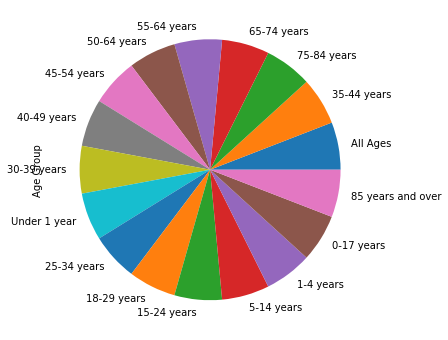

In [5]:
#Categorical Analysis and Visualization

#Pie Chart visualization
Deaths_df['Age Group'].value_counts().plot(kind='pie', figsize=(6,6))

Barchart Analysis 

<AxesSubplot:>

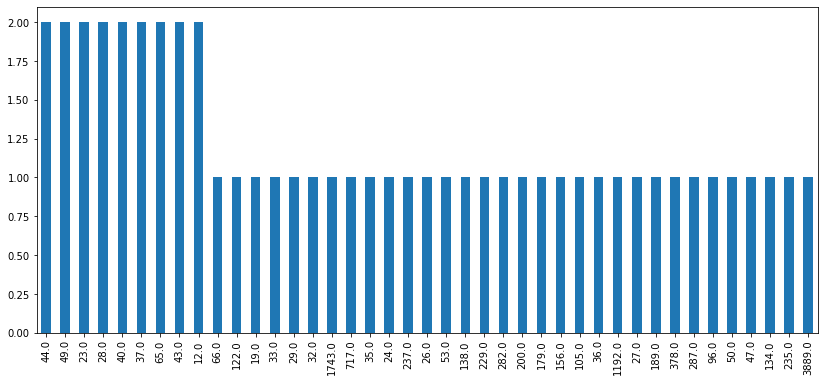

In [6]:


#Barchart Analysis 

# Filter rows where State is Arizone, Age group is 55-64 years , Sex is Male
Deaths_filtered = Deaths_df[(Deaths_df['State']=='Arizona') & (Deaths_df['Age Group'] == '55-64 years') & (Deaths_df['Sex'] == 'Male')]

Deaths_filtered

                          
Deaths_filtered['Pneumonia, Influenza, or COVID-19 Deaths'].value_counts().plot(kind='bar', figsize=(14,6))

<AxesSubplot:xlabel='Age Group', ylabel='Influenza Deaths'>

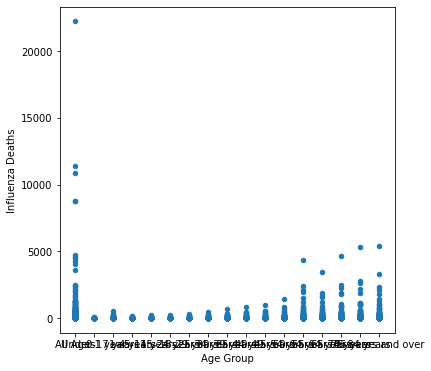

In [7]:
#Scatter Plot Analysis 

Deaths_df.plot(kind='scatter', x='Age Group', y ='Influenza Deaths', figsize=(6,6))
 

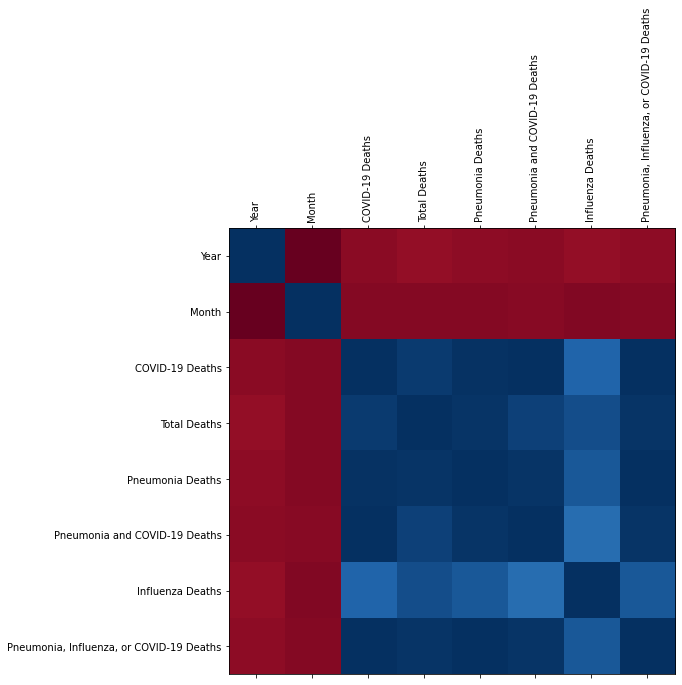

In [8]:
# Correlation Analysis
corr_df= Deaths_df.corr()
corr_df

fig=plt.figure(figsize=(8,8))
plt.matshow(corr_df, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr_df.columns)),corr_df.columns, rotation='vertical');
plt.yticks(range(len(corr_df.columns)),corr_df.columns);

In [9]:
# Which state has the largest deaths  in United States

df=Deaths_df[Deaths_df['State'] !='United States']

df.loc[df['COVID-19 Deaths'].idxmax()]

df.loc[df['Total Deaths'].idxmax()]

df.loc[df['Pneumonia Deaths'].idxmax()]

df.loc[df['Pneumonia and COVID-19 Deaths'].idxmax()]

df.loc[df['Pneumonia and COVID-19 Deaths'].idxmax()]

df.loc[df['Influenza Deaths'].idxmax()]

df.loc[df['Pneumonia, Influenza, or COVID-19 Deaths'].idxmax()]



Data As Of                                           09/27/2023
Start Date                                  2020-01-01 00:00:00
End Date                                             09/23/2023
Group                                                  By Total
Year                                                       2020
Month                                                         1
State                                                California
Sex                                                   All Sexes
Age Group                                              All Ages
COVID-19 Deaths                                        109248.0
Total Deaths                                          1178346.0
Pneumonia Deaths                                       125177.0
Pneumonia and COVID-19 Deaths                           62152.0
Influenza Deaths                                         1753.0
Pneumonia, Influenza, or COVID-19 Deaths               173938.0
Footnote                                

In [10]:
# Analyze on the Percentage of COVID Deaths compared to Total Deaths

Deaths_df['Percentage_Deaths'] = Deaths_df['COVID-19 Deaths'] / Deaths_df['Total Deaths']

Deaths_df['Percentage_Deaths'].head()

0    0.093208
1    0.007089
2    0.012950
3    0.019931
4    0.023128
Name: Percentage_Deaths, dtype: float64

<AxesSubplot:ylabel='Density'>

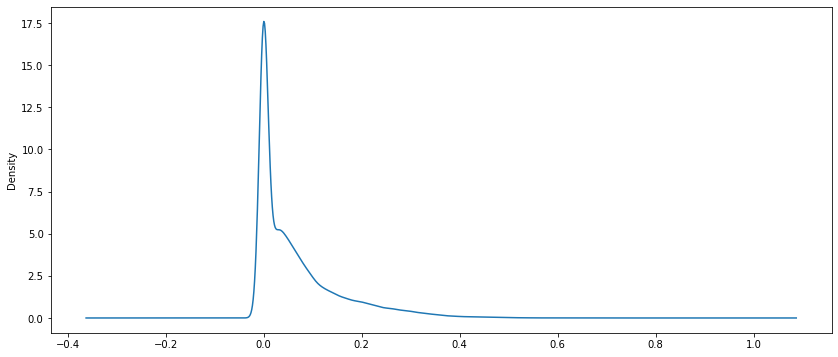

In [11]:
#Density plot Analysis
Deaths_df['Percentage_Deaths'].plot(kind='density', figsize=(14,6))

<AxesSubplot:ylabel='Frequency'>

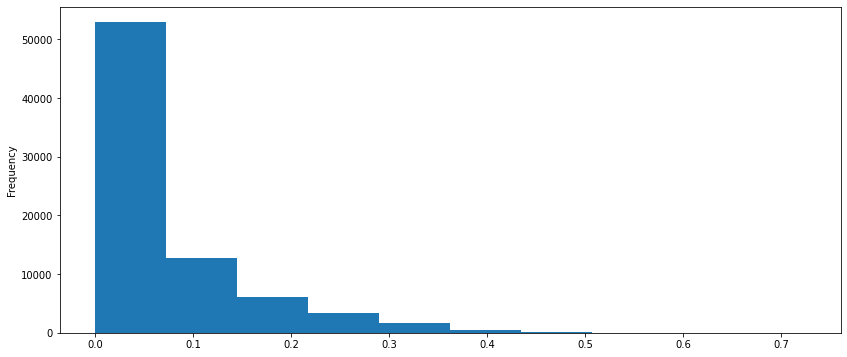

In [12]:
#Histogram Analysis
Deaths_df['Percentage_Deaths'].plot(kind='hist', figsize=(14,6))

# Conclusion
Overall the State of California has the largest death data compared to other States.